![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Limpieza de datos para crear gráficos descriptivos y modelo de ML

Nos dan un dataset con información relativa da distintas películas y el número de likes que han recibido en Facebook y Twitter. Nos piden:

1. Preparar el dataset para crear un modelo de ML que nos permita predecir el número de likes a partir de las características de las películas.
2. Además del modelo, necesitaremos presentar algunos gráficos a nuestros stakeholders. Es necesario que la data este preparada para ello.
3. Identificar problemas graves en la data y comunicarlos lo antes posible.
4. Adicionalmente, nuestro stakeholder tiene "curiosidad" por algunas cifras:
    - Actores más repetidos en el dataset
    - Géneros de películas más comunes
    - Relación entre presupuesto y recaudación


In [1]:
import pandas as pd
import numpy as np

## Leer datos

In [2]:
df_imdb=pd.read_csv('./data/imdb_clase.csv', sep=';',index_col=0)

In [3]:
df_imdb

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,"$116,866,727.00",Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,"$408,992,272.00",Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,color,Quentin Tarantino,187,"$54,116,191.00",Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000
3,Color,Kenneth Lonergan,186,"$46,495.00",Drama,margaret,2011,English,usa,"USD 14,000,000.00",6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,1000
4,Color,Peter Jackson,186,"$258,355,354.00",Adventure|Fantasy,the hobbit: the desolation of smaug,2013,English,USA,"USD 225,000,000.00",7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,"$56,667,870.00",Biography|Drama|History,12 years a slave,2013,English,USA,"USD 20,000,000.00",8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000,1000
95,Color,Richard J. Lewis,134,"$7,501,404.00",Comedy|Drama,barney's version,2010,English,Canada,USD nan,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0,1000
96,Color,Paul Greengrass,134,"$107,100,855.00",Biography|Drama|Thriller,captain phillips,2013,English,USA,"USD 55,000,000.00",7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000,1000
97,Color,David Ayer,134,"$85,707,116.00",Action|Drama|War,fury,2014,English,USA,"USD 68,000,000.00",7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000,1000


## Limpieza de datos

### Revisiones generales: `.columns`, `.index`, `.shape`

In [4]:
df_imdb.columns, df_imdb.index,df_imdb.shape

(Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
        'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
        'movie_facebook_likes', 'movie_twitter_likes'],
       dtype='object'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
             51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
             68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
             85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98],
            dtype='int64'),
 (99, 14))

### Ver algunas observaciones: `.head()`, `.tail()`, `.sample()`

In [5]:
df_imdb.head(),df_imdb.tail(),df_imdb.sample()

(    color      director_name  duration            gross  \
 0   Color    Martin Scorsese       240  $116,866,727.00   
 1   Color        Shane Black       195  $408,992,272.00   
 2  color   Quentin Tarantino       187   $54,116,191.00   
 3   Color   Kenneth Lonergan       186       $46,495.00   
 4   Color      Peter Jackson       186  $258,355,354.00   
 
                                  genres                          movie_title  \
 0          Biography|Comedy|Crime|Drama              the wolf of wall street   
 1               Action|Adventure|Sci-Fi                           iron man 3   
 2  Crime|Drama|Mystery|Thriller|Western                    the hateful eight   
 3                                 Drama                             margaret   
 4                     Adventure|Fantasy  the hobbit: the desolation of smaug   
 
    title_year language country              budget  imdb_score  \
 0        2013  English     USA  USD 100,000,000.00         8.2   
 1        2013  

### Describir dataset: `info()`, `describe()`

In [6]:
df_imdb.info(), df_imdb.describe(), df_imdb.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 99 non-null     object 
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                99 non-null     object 
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
 13  movie_twitter_likes   99 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 11.6+ KB


(None,
          duration   title_year  imdb_score  movie_facebook_likes  \
 count   99.000000    99.000000   99.000000             99.000000   
 mean   155.494949  1944.010101    6.892929          66045.707071   
 std     72.797927   393.848787    1.925514          58108.860365   
 min    -50.000000 -1000.000000   -7.500000              0.000000   
 25%    138.500000  2012.000000    6.550000          25000.000000   
 50%    143.000000  2013.000000    7.200000          54000.000000   
 75%    155.000000  2014.000000    7.850000          85500.000000   
 max    650.000000  2030.000000    8.800000         349000.000000   
 
        movie_twitter_likes  
 count                 99.0  
 mean                1000.0  
 std                    0.0  
 min                 1000.0  
 25%                 1000.0  
 50%                 1000.0  
 75%                 1000.0  
 max                 1000.0  ,
         color director_name    duration gross                   genres  \
 count      88          

### Valores faltantes: `.isnull()`, `.isna()`

In [8]:
df_imdb.isnull(), df_imdb.isna().sum()

(    color  director_name  duration  gross  genres  movie_title  title_year  \
 0   False          False     False  False   False        False       False   
 1   False          False     False  False   False        False       False   
 2   False          False     False  False   False        False       False   
 3   False          False     False  False   False        False       False   
 4   False          False     False  False   False        False       False   
 ..    ...            ...       ...    ...     ...          ...         ...   
 94  False          False     False  False   False        False       False   
 95  False          False     False  False   False        False       False   
 96  False          False     False  False   False        False       False   
 97  False          False     False  False   False        False       False   
 98  False          False     False  False   False        False       False   
 
     language  country  budget  imdb_score  actors

### Quitar filas duplicadas: `.duplicated()`. `.drop_duplicates()`

In [9]:
df_imdb[df_imdb.duplicated(keep=False)].T

,8,9,30,31,52,53,54,55,61,63
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,Joss Whedon,Joss Whedon,Ridley Scott,Ridley Scott,Sam Mendes,Sam Mendes,Baz Luhrmann,Baz Luhrmann,Timur Bekmambetov,Timur Bekmambetov
duration,173,173,150,150,143,143,143,143,141,141
gross,"$623,279,547.00","$623,279,547.00","$65,007,045.00","$65,007,045.00","$304,360,277.00","$304,360,277.00","$144,812,796.00","$144,812,796.00",$nan,$nan
genres,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi,Action|Adventure|Drama,Action|Adventure|Drama,Action|Adventure|Thriller,Action|Adventure|Thriller,Drama|Romance,Drama|Romance,Adventure|Drama|History,Adventure|Drama|History
movie_title,the avengers,the avengers,exodus: gods and kings,exodus: gods and kings,skyfall,skyfall,the great gatsby,the great gatsby,ben-hur,ben-hur
title_year,2012,2012,2014,2014,2012,2012,2013,2013,2016,2016
language,English,English,English,English,English,English,English,English,English,English
country,USA,USA,UK,UK,UK,UK,Australia,Australia,USA,USA
budget,"USD 220,000,000.00","USD 220,000,000.00","USD 140,000,000.00","USD 140,000,000.00","USD 200,000,000.00","USD 200,000,000.00","USD 105,000,000.00","USD 105,000,000.00","USD 100,000,000.00","USD 100,000,000.00"


In [10]:
df_imdb.drop_duplicates(inplace=True)

In [11]:
df_imdb.shape

(94, 14)

## Tratamiento de columnas

Dylan:

- `color`
- `director_name`
- `gross`
- `duration`

Todos:
- `movie_title`
- `title_year`
- `movie_twitter_likes`
- `imdb_score`
- `country`
- `language`
- `actors`
- `movie_facebook_likes`


### Columna `color`

In [12]:
df_imdb.color.value_counts(dropna=False)

Color               81
NaN                 11
color                1
 Black and White     1
Name: color, dtype: int64

In [13]:
df_imdb.loc[df_imdb.color.isnull(),'color']='Color'

In [14]:
df_imdb.color=df_imdb.color.str.strip().str.capitalize()

In [15]:
assert df_imdb.color.isnull().any()==False

In [16]:
df_imdb.color.value_counts(dropna=False)

Color              93
Black and white     1
Name: color, dtype: int64

### Columna `director_name`

In [17]:
df_imdb.director_name.value_counts(dropna=False)

NaN                  11
Michael Bay           3
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
                     ..
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Kenneth Lonergan      1
Clint Eastwood        1
Name: director_name, Length: 64, dtype: int64

In [18]:
df_imdb[df_imdb.director_name.isnull()].T

,5,24,32,41,56,59,71,75,82,84,91
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,183,156,150,147,143,142,139,138,137,137,136
gross,"$330,249,062.00","$183,635,922.00","$182,204,440.00","$407,197,282.00",$nan,"$407,999,255.00","$150,832,203.00","$150,117,807.00","$37,304,950.00","$281,666,058.00","$52,474,616.00"
genres,Action|Adventure|Sci-Fi,Adventure|Drama|Thriller|Western,Biography|Drama|History|War,Action|Adventure|Sci-Fi,Drama|Horror|Thriller,Adventure|Drama|Sci-Fi|Thriller,Adventure|Mystery|Sci-Fi,Crime|Drama,Biography|Crime|Drama,Adventure|Sci-Fi,Drama
movie_title,batman v superman: dawn of justice,the revenant,lincoln,captain america: civil war,the ridges,the hunger games,divergent,american hustle,j. edgar,the hunger games: mockingjay - part 2,wall street: money never sleeps
title_year,202,2015,2012,2016,2011,2012,1800,2013,2011,2015,2010
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
budget,"USD 250,000,000.00","USD 135,000,000.00","USD 65,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 78,000,000.00","USD 85,000,000.00","USD 40,000,000.00","USD 35,000,000.00","USD 160,000,000.00","USD 70,000,000.00"


In [19]:
df_imdb.loc[df_imdb.director_name.isnull(),'director_name']='No information available'

In [20]:
df_imdb.director_name.value_counts(dropna=False)

No information available    11
Michael Bay                  3
Peter Jackson                3
Christopher Nolan            3
Ridley Scott                 3
                            ..
Adam McKay                   1
Zack Snyder                  1
Baz Luhrmann                 1
Kenneth Lonergan             1
Clint Eastwood               1
Name: director_name, Length: 64, dtype: int64

In [102]:
#df_imdb.loc[(df_imdb.director_name=='Nan') | (df_imdb.director_name=='Null') ,'director_name']='No information available'

In [21]:
df_imdb.loc[df_imdb.director_name.str.lower().str.strip().isin(['null','nan']),'director_name']='No information available'

In [104]:
"""df_imdb.loc[df_imdb.director_name.str.lower().str.strip().str.match('null'|'nan'),'director_name']='No information available'"""

"df_imdb.loc[df_imdb.director_name.str.lower().str.strip().str.match('null'|'nan'),'director_name']='No information available'"

### Columna `gross`

In [22]:
df_imdb.gross.value_counts(dropna=False)


$nan               6
$148,775,460.00    2
$115,603,980.00    2
$116,866,727.00    1
$80,574,010.00     1
                  ..
$3,958,500.00      1
$182,204,440.00    1
$65,007,045.00     1
$228,430,993.00    1
$47,034,272.00     1
Name: gross, Length: 87, dtype: int64

In [23]:
df_imdb.gross=df_imdb.gross.str.replace('$','',regex=False).str.replace(',','').astype('float')

In [24]:
df_imdb.gross.isnull().sum()

6

In [25]:
df_imdb.gross.mean()

1136505020628.125

In [26]:
df_imdb.gross


0     116866727.0
1     408992272.0
2      54116191.0
3         46495.0
4     258355354.0
         ...     
94     56667870.0
95      7501404.0
96    107100855.0
97     85707116.0
98     47034272.0
Name: gross, Length: 94, dtype: float64

In [27]:
df_imdb.gross.describe()

count    8.800000e+01
mean     1.136505e+12
std      1.066002e+13
min     -9.293900e+04
25%      4.158910e+07
50%      1.061603e+08
75%      2.298020e+08
max      1.000000e+14
Name: gross, dtype: float64

<AxesSubplot:>

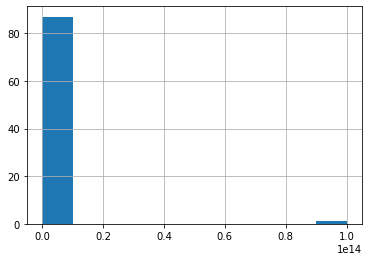

In [28]:
df_imdb.gross.hist()

In [29]:
df_imdb.loc[(df_imdb.gross>1e9) | (df_imdb.gross<0),'gross']=np.nan

In [30]:
df_imdb.gross.isnull().sum()

9

In [31]:
df_imdb.loc[df_imdb.gross.isnull(),'gross']=df_imdb.gross.mean()

In [32]:
assert df_imdb.gross.isnull().any()==False

<AxesSubplot:>

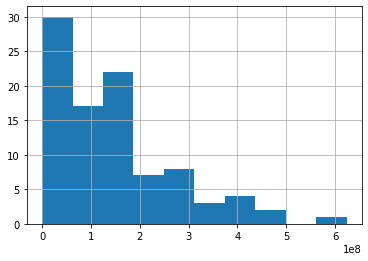

In [33]:
df_imdb.gross.hist()

### Columna `genres`


In [34]:
df_imdb.genres

0             Biography|Comedy|Crime|Drama
1                  Action|Adventure|Sci-Fi
2     Crime|Drama|Mystery|Thriller|Western
3                                    Drama
4                        Adventure|Fantasy
                      ...                 
94                 Biography|Drama|History
95                            Comedy|Drama
96                Biography|Drama|Thriller
97                        Action|Drama|War
98           Biography|Drama|Music|Musical
Name: genres, Length: 94, dtype: object

In [35]:
df_imdb[df_imdb.genres.isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
12,Color,Christopher Spencer,170,59696176.0,NaN,son of god,2014,English,USA,"USD 22,000,000.00",5.6,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000,1000


In [36]:
df_imdb.loc[df_imdb.genres.isnull(),'genres']='Drama|Sci-Fi'

In [37]:
df_imdb.genres.str.split('|').str.len().max()

5

In [38]:
generos_cols=df_imdb.genres.str.split('|',n=5,expand=True)

In [39]:
df_imdb['genero_1']=generos_cols[0]
df_imdb['genero_2']=generos_cols[1]
df_imdb['genero_3']=generos_cols[2]
df_imdb['genero_4']=generos_cols[3]
df_imdb['genero_5']=generos_cols[4]

<AxesSubplot:>

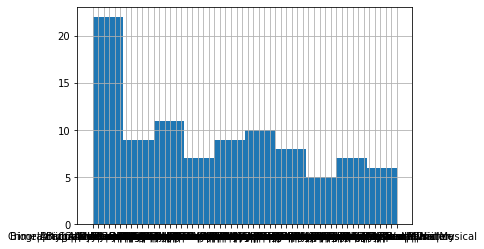

In [40]:
df_imdb.genres.hist()

In [41]:
df_imdb.drop('genres',axis=1,inplace=True)

### Columna `budget`

In [42]:
df_imdb.budget

0     USD 100,000,000.00
1     USD 200,000,000.00
2      USD 44,000,000.00
3      USD 14,000,000.00
4     USD 225,000,000.00
             ...        
94     USD 20,000,000.00
95               USD nan
96     USD 55,000,000.00
97     USD 68,000,000.00
98     USD 40,000,000.00
Name: budget, Length: 94, dtype: object

In [43]:
df_imdb.budget=df_imdb.budget.str.replace('USD','',regex=False).str.replace(',','').astype('float')

In [44]:
df_imdb.budget.isnull().sum()

4

In [45]:
df_imdb.budget.describe()

count    9.000000e+01
mean     1.021824e+08
std      7.742864e+07
min      1.735000e+04
25%      4.000000e+07
50%      7.250000e+07
75%      1.687500e+08
max      2.500000e+08
Name: budget, dtype: float64

In [46]:
df_imdb.loc[df_imdb.budget.isnull(),'budget']=df_imdb.budget.mean()

<AxesSubplot:xlabel='budget', ylabel='gross'>

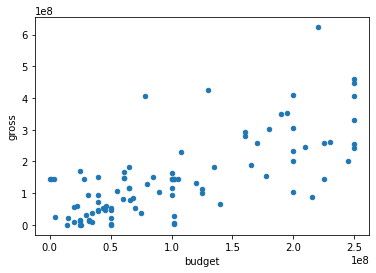

In [47]:
df_imdb.plot.scatter(x="budget", y="gross")


### Columna `duration`

In [48]:
df_imdb.duration

0     240
1     195
2     187
3     186
4     186
     ... 
94    134
95    134
96    134
97    134
98      5
Name: duration, Length: 94, dtype: int64

In [49]:
df_imdb.duration.value_counts(dropna=False)

 141    6
 137    6
 138    6
 136    5
 143    5
 134    4
 148    4
 146    4
 139    4
 144    4
 140    4
 142    3
 153    3
 158    3
 150    3
 165    2
 149    2
 164    2
 156    2
 135    2
 186    2
 147    1
 240    1
 650    1
 151    1
 195    1
 154    1
 157    1
 580    1
 167    1
 169    1
 170    1
 172    1
 173    1
 180    1
-50     1
 183    1
 187    1
 5      1
Name: duration, dtype: int64

In [50]:
df_imdb.duration.describe()

count     94.000000
mean     155.787234
std       74.666840
min      -50.000000
25%      138.000000
50%      143.500000
75%      155.500000
max      650.000000
Name: duration, dtype: float64

In [51]:
df_imdb.duration.isna().sum()

0

<AxesSubplot:>

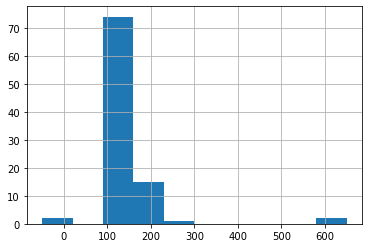

In [52]:
df_imdb.duration.hist()

In [53]:
df_imdb.loc[(df_imdb.duration>400) | (df_imdb.duration<=5),'duration']=np.nan

In [54]:
df_imdb.loc[df_imdb.duration.isnull(),'duration']=df_imdb.duration.median()

<AxesSubplot:>

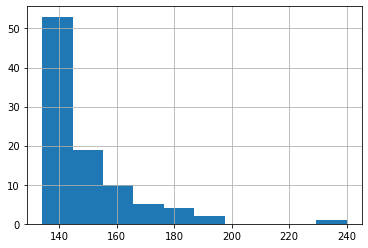

In [55]:
df_imdb.duration.hist()

In [137]:
def identify_films(gross, rating):
    if gross > 150_000_000 and rating < 6.5:
        return "High gross, low rating"
    if gross<80_000_000 and rating >8:
        return "Low gross, high rating"
    return 'Normal'

In [138]:
df_imdb['type_film']=df_imdb.apply(lambda row:identify_films(row['gross'],row['imdb_score']),axis=1)

## Guardar dataset

In [139]:
df_imdb.to_csv('data/imdb_final.csv',sep=';',index=False)


### Columna `movie_title`

In [56]:
df_imdb.movie_title.value_counts(dropna=False)

unbroken                   2
les misérables             2
ben-hur                    2
the wolf of wall street    1
get on up                  1
                          ..
lincoln                    1
exodus: gods and kings     1
the martian                1
the amazing spider-man     1
jersey boys                1
Name: movie_title, Length: 91, dtype: int64

In [57]:
df_imdb.drop_duplicates('movie_title',inplace=True)

In [58]:
df_imdb.shape

(91, 18)

In [59]:
df_imdb.movie_title=df_imdb.movie_title.str.title()

In [60]:
df_imdb.movie_title

0                 The Wolf Of Wall Street
1                              Iron Man 3
2                       The Hateful Eight
3                                Margaret
4     The Hobbit: The Desolation Of Smaug
                     ...                 
94                       12 Years A Slave
95                       Barney'S Version
96                       Captain Phillips
97                                   Fury
98                            Jersey Boys
Name: movie_title, Length: 91, dtype: object

### Columna `title_year`

In [61]:
df_imdb.title_year.value_counts(dropna=False)

 2014    21
 2012    18
 2013    17
 2011    10
 2015     8
 2010     7
 2016     5
 202      1
-1000     1
 2030     1
 1800     1
 205      1
Name: title_year, dtype: int64

In [62]:
df_imdb[(df_imdb.title_year<=205) | (df_imdb.title_year==2030) | (df_imdb.title_year==1800) ]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5
5,Color,No information available,183.0,330249062.0,Batman V Superman: Dawn Of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000,1000,Action,Adventure,Sci-Fi,None,None
20,Color,Tom Hooper,158.0,148775460.0,Les Misérables,-1000,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000,1000,Drama,Musical,Romance,None,None
60,Color,Joss Whedon,141.0,458991599.0,Avengers: Age Of Ultron,2030,English,USA,250000000.0,7.5,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",118000,1000,Action,Adventure,Sci-Fi,None,None
71,Color,No information available,139.0,150832203.0,Divergent,1800,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000,1000,Adventure,Mystery,Sci-Fi,None,None
81,Color,Daniel Espinosa,137.0,1206135.0,Child 44,205,English,Czech Republic,50000000.0,6.4,"Tom Hardy,Fares Fares,Michael Nardone",18000,1000,Crime,Drama,Thriller,None,None


In [63]:
df_imdb.loc[df_imdb.title_year==202,'title_year']=2016

In [64]:
df_imdb.loc[df_imdb.title_year==-1000,'title_year']=2012

In [65]:
df_imdb.loc[df_imdb.title_year==2030,'title_year']=2015

In [66]:
df_imdb.loc[df_imdb.title_year==205,'title_year']=2015

In [67]:
df_imdb.loc[df_imdb.title_year==1800,'title_year']=2014

In [68]:
df_imdb.title_year.value_counts(dropna=False)

2014    22
2012    19
2013    17
2015    10
2011    10
2010     7
2016     6
Name: title_year, dtype: int64

### Columna `movie_twitter_likes`

In [69]:
df_imdb.movie_twitter_likes.value_counts(dropna=False)

1000    91
Name: movie_twitter_likes, dtype: int64

In [70]:
df_imdb.movie_twitter_likes.describe()

count      91.0
mean     1000.0
std         0.0
min      1000.0
25%      1000.0
50%      1000.0
75%      1000.0
max      1000.0
Name: movie_twitter_likes, dtype: float64

<AxesSubplot:>

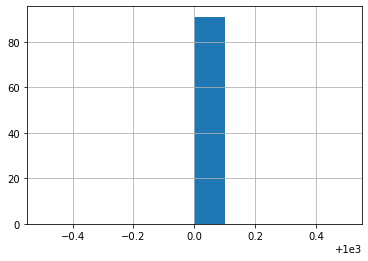

In [71]:
df_imdb.movie_twitter_likes.hist()

In [72]:
df_imdb.drop('movie_twitter_likes',axis=1,inplace=True)

In [73]:
df_imdb


,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,genero_1,genero_2,genero_3,genero_4,genero_5
0,Color,Martin Scorsese,240.0,116866727.0,The Wolf Of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,None
1,Color,Shane Black,195.0,408992272.0,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,Action,Adventure,Sci-Fi,None,None
2,Color,Quentin Tarantino,187.0,54116191.0,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,Crime,Drama,Mystery,Thriller,Western
3,Color,Kenneth Lonergan,186.0,46495.0,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,Drama,None,None,None,None
4,Color,Peter Jackson,186.0,258355354.0,The Hobbit: The Desolation Of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,Adventure,Fantasy,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134.0,56667870.0,12 Years A Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000,Biography,Drama,History,None,None
95,Color,Richard J. Lewis,134.0,7501404.0,Barney'S Version,2010,English,Canada,102182415.0,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0,Comedy,Drama,None,None,None
96,Color,Paul Greengrass,134.0,107100855.0,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000,Biography,Drama,Thriller,None,None
97,Color,David Ayer,134.0,85707116.0,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000,Action,Drama,War,None,None


### Columna `imdb_score`

In [74]:
df_imdb.imdb_score.value_counts(dropna=False)

 6.7    9
 8.1    8
 7.3    7
 7.9    5
 7.2    5
 7.6    4
 6.5    4
 6.1    4
 7.4    4
 8.2    3
 6.3    3
 7.8    3
 6.9    3
 8.5    2
 7.5    2
 8.0    2
 7.0    2
 6.6    2
 6.8    2
 5.7    2
 7.1    2
 5.8    1
 5.9    1
-1.2    1
 6.4    1
 5.3    1
 8.8    1
 3.0    1
 4.3    1
 8.4    1
-7.5    1
 5.6    1
 8.6    1
 8.7    1
Name: imdb_score, dtype: int64

In [75]:
df_imdb.imdb_score.describe()

count    91.000000
mean      6.881319
std       1.995100
min      -7.500000
25%       6.600000
50%       7.200000
75%       7.900000
max       8.800000
Name: imdb_score, dtype: float64

<AxesSubplot:>

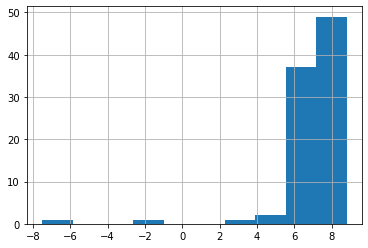

In [76]:
df_imdb.imdb_score.hist()

In [77]:
df_imdb.loc[df_imdb.imdb_score<0,'imdb_score']=np.nan

In [78]:
df_imdb.loc[df_imdb.imdb_score.isnull(),'imdb_score']=np.round(df_imdb.imdb_score.mean(),1)

<AxesSubplot:>

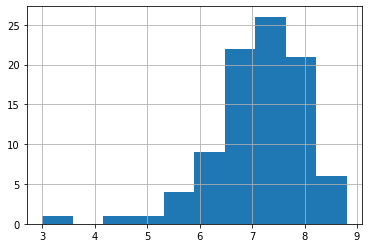

In [79]:
df_imdb.imdb_score.hist()

### Columna `country`

In [80]:
df_imdb.country.value_counts(dropna=False)

USA               72
UK                 6
usa                3
France             2
Germany            1
New Zealand        1
India              1
United States      1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

In [81]:
df_imdb.loc[(df_imdb.country.str.strip()=='usa') | (df_imdb.country.str.strip()=='United States'),'country']='USA'

In [82]:
df_imdb.country.value_counts(dropna=False)

USA               76
UK                 6
France             2
Germany            1
New Zealand        1
India              1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

### Columna `language`

In [83]:
df_imdb.language.value_counts(dropna=False)

English    91
Name: language, dtype: int64

In [84]:
df_imdb.language.describe()

count          91
unique          1
top       English
freq           91
Name: language, dtype: object

In [85]:
df_imdb.loc[df_imdb.country=='France','language']='French'
df_imdb.loc[df_imdb.country=='Germany','language']='German'
df_imdb.loc[df_imdb.country=='Czech Republic','language']='Czech'
df_imdb.loc[df_imdb.country=='Kyrgyzstan','language']='Kyrgyz'

In [86]:
df_imdb.language.value_counts(dropna=False)

English    86
French      2
German      1
Czech       1
Kyrgyz      1
Name: language, dtype: int64

### Columna `movie_facebook_likes`

In [87]:
df_imdb.movie_facebook_likes.value_counts(dropna=False)

0         7
82000     3
24000     2
47000     2
39000     2
         ..
146000    1
5000      1
95000     1
85000     1
31000     1
Name: movie_facebook_likes, Length: 67, dtype: int64

In [88]:
df_imdb.movie_facebook_likes.describe()

count        91.000000
mean      65829.945055
std       58602.262111
min           0.000000
25%       25000.000000
50%       54000.000000
75%       84000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [118]:
df_imdb.movie_facebook_likes.sort_values()

95         0
92         0
3          0
42         0
47         0
       ...  
38    175000
24    190000
5     197000
16    199000
13    349000
Name: movie_facebook_likes, Length: 91, dtype: int64

<AxesSubplot:>

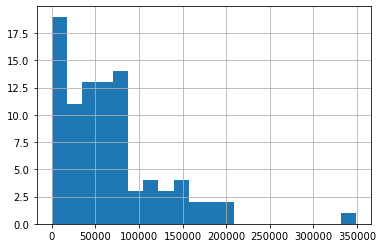

In [89]:
df_imdb.movie_facebook_likes.hist(bins=20)

In [90]:
df_imdb.loc[df_imdb.movie_facebook_likes>3e5,'movie_facebook_likes']=np.nan

In [91]:
df_imdb.loc[df_imdb.movie_facebook_likes.isnull(),'movie_facebook_likes']=df_imdb.movie_facebook_likes.median()

### Columna `actors`

In [92]:
df_imdb.actors.value_counts(dropna=False)

Aidan Turner,Adam Brown,James Nesbitt                   3
Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    2
Leonardo DiCaprio,Matthew McConaughey,Jon Favreau       1
Robert Downey Jr.,Robert Duvall,Leighton Meester        1
Brad Pitt,Tye Sheridan,Fiona Shaw                       1
                                                       ..
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Lesley Manville,Ruth Sheen,Karl Johnson                 1
Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill          1
Christian Bale,María Valverde,Ben Mendelsohn            1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: actors, Length: 88, dtype: int64

In [93]:
df_imdb.actors.isnull().sum()

0

In [94]:
df_imdb.actors.str.split(',').str.len().max()

3

In [95]:
col_actors=df_imdb.actors.str.split(',',n=3,expand=True)

In [96]:
df_imdb['actor_0']=col_actors[0]
df_imdb['actor_1']=col_actors[1]
df_imdb['actor_2']=col_actors[2]

In [97]:
df_imdb

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,genero_1,genero_2,genero_3,genero_4,genero_5,actor_0,actor_1,actor_2
0,Color,Martin Scorsese,240.0,116866727.0,The Wolf Of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000.0,Biography,Comedy,Crime,Drama,None,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Color,Shane Black,195.0,408992272.0,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000.0,Action,Adventure,Sci-Fi,None,None,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Color,Quentin Tarantino,187.0,54116191.0,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000.0,Crime,Drama,Mystery,Thriller,Western,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Color,Kenneth Lonergan,186.0,46495.0,Margaret,2011,English,USA,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0.0,Drama,None,None,None,None,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Color,Peter Jackson,186.0,258355354.0,The Hobbit: The Desolation Of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000.0,Adventure,Fantasy,None,None,None,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134.0,56667870.0,12 Years A Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000.0,Biography,Drama,History,None,None,Quvenzhané Wallis,Scoot McNairy,Taran Killam
95,Color,Richard J. Lewis,134.0,7501404.0,Barney'S Version,2010,English,Canada,102182415.0,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0.0,Comedy,Drama,None,None,None,Mark Addy,Atom Egoyan,Paul Gross
96,Color,Paul Greengrass,134.0,107100855.0,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000.0,Biography,Drama,Thriller,None,None,Tom Hanks,Chris Mulkey,Michael Chernus
97,Color,David Ayer,134.0,85707116.0,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000.0,Action,Drama,War,None,None,Brad Pitt,Logan Lerman,Jim Parrack


In [98]:
df_imdb.drop('actors',axis=1,inplace=True)

## GENEROS MÁS REPETIDOS

In [116]:
pd.concat([df_imdb.genero_1,df_imdb.genero_2,df_imdb.genero_3,df_imdb.genero_4,df_imdb.genero_5],axis=0).value_counts()

Drama        59
Adventure    35
Action       30
Thriller     28
Sci-Fi       23
Crime        17
Biography    14
History      12
Fantasy       9
Romance       7
Mystery       7
Comedy        7
War           6
Western       5
Musical       3
Music         3
Sport         2
Animation     1
Horror        1
dtype: int64

## ACTORES MÁS REPETIDOS

In [117]:
pd.concat([df_imdb.actor_0,df_imdb.actor_1,df_imdb.actor_2]).value_counts()

Leonardo DiCaprio     7
Jennifer Lawrence     6
Tom Hardy             5
Robert Downey Jr.     5
Scarlett Johansson    4
                     ..
Ruth Wilson           1
Sela Ward             1
Peter Dinklage        1
Mark Valley           1
Scott Vance           1
Length: 209, dtype: int64

In [110]:
pd.set_option("display.max_rows",100)